In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
import time
from itertools import permutations
from operator import itemgetter
import math
from scipy.stats.stats import pearsonr

In [186]:
df = pd.read_csv('D:\EPAM Internship\Python/my_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [187]:
clf = DecisionTreeClassifier(min_samples_leaf=250, min_samples_split=100)

In [188]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [189]:
df.Sex.replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)

In [190]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96332 entries, 2 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  96332 non-null  int64  
 1   Pclass    96332 non-null  int64  
 2   Sex       96332 non-null  int64  
 3   Age       96332 non-null  float64
 4   SibSp     96332 non-null  int64  
 5   Parch     96332 non-null  int64  
 6   Fare      96332 non-null  float64
 7   Embarked  96332 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 6.6+ MB


In [46]:
arr = np.array([1, 2, 3])
perms = list(permutations(arr))

In [47]:
for perm in perms:
    other_df = df.copy()
    other_df.Embarked.replace(to_replace=['S', 'C', 'Q'], value=perm, inplace=True)
    print(other_df.corrwith(other_df.Embarked))
    print('\n\n\n')

Survived    0.317779
Pclass     -0.354787
Sex         0.316658
Age         0.194994
SibSp      -0.038471
Parch       0.004321
Fare        0.234051
Embarked    1.000000
dtype: float64




Survived    0.371129
Pclass     -0.337818
Sex         0.329773
Age         0.143645
SibSp      -0.027724
Parch       0.012141
Fare        0.239623
Embarked    1.000000
dtype: float64




Survived   -0.254431
Pclass      0.156068
Sex        -0.186559
Age        -0.015499
SibSp       0.002028
Parch      -0.015324
Fare       -0.130997
Embarked    1.000000
dtype: float64




Survived    0.254431
Pclass     -0.156068
Sex         0.186559
Age         0.015499
SibSp      -0.002028
Parch       0.015324
Fare        0.130997
Embarked    1.000000
dtype: float64




Survived   -0.371129
Pclass      0.337818
Sex        -0.329773
Age        -0.143645
SibSp       0.027724
Parch      -0.012141
Fare       -0.239623
Embarked    1.000000
dtype: float64




Survived   -0.317779
Pclass      0.354787
Sex        -0.316658
Ag

In [48]:
df.Embarked.value_counts().index

Index(['S', 'C', 'Q'], dtype='object')

In [49]:
def tune_feature_values(feature, values, df):
    corrs = []
    for value in values:
        other_df = df.copy()
        other_df[feature].replace(to_replace=other_df[feature].value_counts().index, value=value, inplace=True)
        corrs.append((other_df.corrwith(other_df[feature]).Survived, value))
    return sorted(corrs, key=lambda elem: abs(elem[0]), reverse=True)[0]

In [50]:
tune_feature_values('Embarked', perms, df)

(-0.3711293381094012, (3, 1, 2))

In [53]:
for p in range(2, 10):
    perms += list(permutations(arr**p))

In [54]:
tune_feature_values('Embarked', perms, df)

(-0.3722274900010945, (9, 1, 4))

In [55]:
tune_feature_values('Embarked', [(1, 2, 3)], df)

(0.31777879107956125, (1, 2, 3))

In [118]:
other_df.corrwith(other_df.Fare.apply(lambda fare: fare * (fare - 100) - (fare - 300) * (fare - 500))).Survived

0.2013923441190116

In [69]:
other_df.corrwith(other_df.Fare).Survived

0.18791299911927545

<AxesSubplot:>

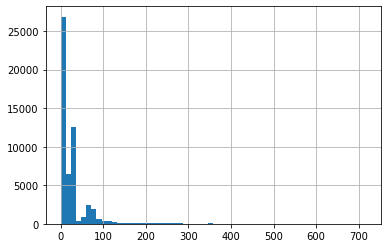

In [112]:
other_df[other_df.Survived == 0].Fare.hist(bins=60)

<AxesSubplot:>

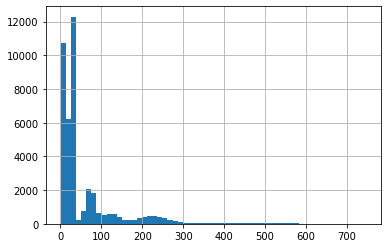

In [113]:
other_df[other_df.Survived == 1].Fare.hist(bins=60)

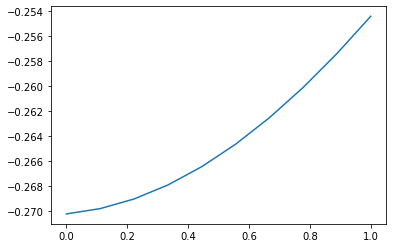

In [192]:
params = np.linspace(0, 1, 10)
corrs = [pearsonr(df.Survived, df.Fare.apply(lambda fare: math.sin(10 / fare) + p * math.sin(10 / (250 - fare))))[0] for p in params]
plt.plot(params, corrs)

In [199]:
pearsonr(df.Survived, df.Fare.apply(lambda fare: math.sin(10 / fare) + 0 * math.sin(200 / (800 - fare))))[0]

-0.27023817260488553